In [599]:
# set up the environment
%pylab
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import seaborn as sns
sns.set()
import pandas as pd
import scipy as sp
import scipy.stats
import statsmodels.stats.api as sms
import statsmodels.api as sm
import statsmodels.formula.api as smf

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [600]:
with open("ARM_data/child.iq/kidiq.dta") as f:
    df = pd.read_stata(f)
df.head()

,kid_score,mom_hs,mom_iq,mom_work,mom_age
0,65,1.0,121.117529,4,27
1,98,1.0,89.361882,4,25
2,85,1.0,115.443165,4,27
3,83,1.0,99.449639,3,25
4,115,1.0,92.745710,4,27


In [603]:
smf.ols('kid_score ~ mom_hs+mom_iq+C(mom_work)+mom_age', data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              kid_score   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     20.22
Date:                Mon, 05 Mar 2018   Prob (F-statistic):           7.55e-21
Time:                        13:34:10   Log-Likelihood:                -1870.0
No. Observations:                 434   AIC:                             3754.
Df Residuals:                     427   BIC:                             3783.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           20.2727      9.393      2.158      0.031       1.810      38.735
C(mom_work)[T.2]     2.9827      2.813      1.060      0.290      -2.546       8.511
C(mom_work)[T.3]     5.4882      3.252      1.687      0.092      -0.904      11.881
C(mom_work)[T.4]     1.4193      2.516      0.564      0.573      -3.526       6.365
mom_hs               5.4347      2.325      2.337      0.020       0.864      10.005
mom_iq               0.5529      0.061      9.008      0.000       0.432       0.674
mom_age              0.2163      0.334      0.649      0.517      -0.439       0.872
==============================================================================
Omnibus:                        6.368   Durbin-Watson:                   1.612
Prob(Omnibus):                  0.041   Jarque-Bera (JB):                6.525
Skew:                          -0.292   Prob(JB):                       0.0383
Kurtosis:                       2.862   Cond. No.                     1.12e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

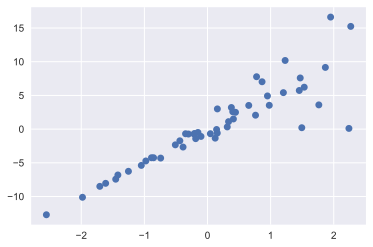

In [617]:
## heteroskedasticity
np.random.seed(0)
n = 50
df3 = pd.DataFrame()
df3["x"] = np.random.randn(n)
df3["y"] = 5*df3["x"] + np.random.randn(n)*exp(df3["x"])
plot(df3["x"],df3["y"],'o')

In [618]:
smf.ols('y ~ x', data=df3).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     205.4
Date:                Mon, 05 Mar 2018   Prob (F-statistic):           5.75e-19
Time:                        13:46:09   Log-Likelihood:                -117.87
No. Observations:                  50   AIC:                             239.7
Df Residuals:                      48   BIC:                             243.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1573      0.372     -0.423      0.674      -0.905       0.590
x              4.6982      0.328     14.333      0.000       4.039       5.357
==============================================================================
Omnibus:                       20.609   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               70.630
Skew:                          -0.851   Prob(JB):                     4.60e-16
Kurtosis:                       8.568   Cond. No.                         1.19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [619]:
smf.ols('y ~ x', data=df3).fit(cov_type='HC0').summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     93.93
Date:                Mon, 05 Mar 2018   Prob (F-statistic):           6.99e-13
Time:                        13:46:10   Log-Likelihood:                -117.87
No. Observations:                  50   AIC:                             239.7
Df Residuals:                      48   BIC:                             243.6
Df Model:                           1                                         
Covariance Type:                  HC0                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1573      0.300     -0.525      0.600      -0.745       0.430
x              4.6982      0.485      9.692      0.000       3.748       5.648
==============================================================================
Omnibus:                       20.609   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               70.630
Skew:                          -0.851   Prob(JB):                     4.60e-16
Kurtosis:                       8.568   Cond. No.                         1.19
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

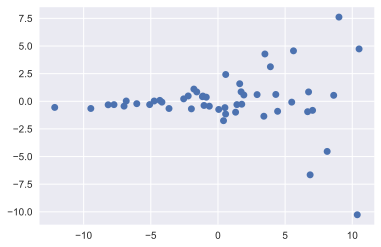

In [620]:
lm = smf.ols('y ~ x', data=df3).fit()
plot(lm.predict(df3), lm.resid,'o')

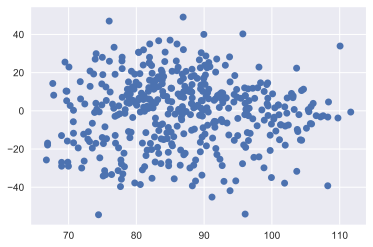

In [621]:
# does the kid iq dataset have heteroskedasticity?
lm = smf.ols('kid_score ~ mom_hs+mom_iq+C(mom_work)+mom_age', data=df).fit()
plot(lm.predict(df), lm.resid,'o')

In [622]:
## higher order terms
mtcars=sm.datasets.get_rdataset('mtcars').data

In [623]:
mtcars

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [624]:
lm = smf.ols('mpg ~ hp', data=mtcars).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     45.46
Date:                Mon, 05 Mar 2018   Prob (F-statistic):           1.79e-07
Time:                        13:52:31   Log-Likelihood:                -87.619
No. Observations:                  32   AIC:                             179.2
Df Residuals:                      30   BIC:                             182.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.0989      1.634     18.421      0.000      26.762      33.436
hp            -0.0682      0.010     -6.742      0.000      -0.089      -0.048
==============================================================================
Omnibus:                        3.692   Durbin-Watson:                   1.134
Prob(Omnibus):                  0.158   Jarque-Bera (JB):                2.984
Skew:                           0.747   Prob(JB):                        0.225
Kurtosis:                       2.935   Cond. No.                         386.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

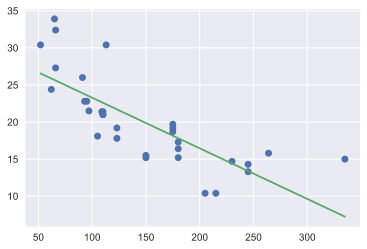

In [625]:
rrange = pd.DataFrame()
rrange["hp"] = np.arange(mtcars["hp"].min(),mtcars["hp"].max(),.1)
plot(mtcars["hp"],mtcars["mpg"],'o')
plot(rrange,lm.predict(rrange))

In [626]:
lm = smf.ols('mpg ~ hp + I(hp*hp)', data=mtcars).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     44.95
Date:                Mon, 05 Mar 2018   Prob (F-statistic):           1.30e-09
Time:                        13:54:02   Log-Likelihood:                -79.801
No. Observations:                  32   AIC:                             165.6
Df Residuals:                      29   BIC:                             170.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     40.4091      2.741     14.744      0.000      34.804      46.015
hp            -0.2133      0.035     -6.115      0.000      -0.285      -0.142
I(hp * hp)     0.0004   9.84e-05      4.275      0.000       0.000       0.001
==============================================================================
Omnibus:                        6.211   Durbin-Watson:                   1.697
Prob(Omnibus):                  0.045   Jarque-Bera (JB):                4.579
Skew:                           0.844   Prob(JB):                        0.101
Kurtosis:                       3.767   Cond. No.                     1.78e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.78e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

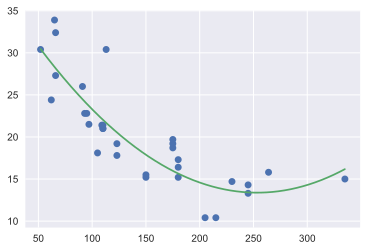

In [627]:
rrange = pd.DataFrame()
rrange["hp"] = np.arange(mtcars["hp"].min(),mtcars["hp"].max(),.1)
plot(mtcars["hp"],mtcars["mpg"],'o')
plot(rrange,lm.predict(rrange))

In [628]:
smf.ols('kid_score ~ mom_hs+mom_iq+mom_hs:mom_iq+C(mom_work)+mom_age', data=df).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              kid_score   R-squared:                       0.237
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     18.94
Date:                Mon, 05 Mar 2018   Prob (F-statistic):           4.97e-22
Time:                        13:55:00   Log-Likelihood:                -1865.5
No. Observations:                 434   AIC:                             3747.
Df Residuals:                     426   BIC:                             3780.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -19.5745     16.225     -1.206      0.228     -51.465      12.316
C(mom_work)[T.2]     1.9464      2.808      0.693      0.489      -3.573       7.466
C(mom_work)[T.3]     4.9426      3.228      1.531      0.126      -1.401      11.286
C(mom_work)[T.4]     0.7867      2.502      0.314      0.753      -4.131       5.704
mom_hs              51.6398     15.582      3.314      0.001      21.013      82.266
mom_iq               0.9641      0.150      6.426      0.000       0.669       1.259
mom_hs:mom_iq       -0.4940      0.165     -2.998      0.003      -0.818      -0.170
mom_age              0.3344      0.333      1.005      0.316      -0.320       0.988
==============================================================================
Omnibus:                        7.073   Durbin-Watson:                   1.653
Prob(Omnibus):                  0.029   Jarque-Bera (JB):                7.254
Skew:                          -0.312   Prob(JB):                       0.0266
Kurtosis:                       2.895   Cond. No.                     3.34e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.34e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [629]:
smf.ols('kid_score ~ mom_hs*mom_iq+C(mom_work)+mom_age', data=df).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              kid_score   R-squared:                       0.237
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     18.94
Date:                Mon, 05 Mar 2018   Prob (F-statistic):           4.97e-22
Time:                        13:58:15   Log-Likelihood:                -1865.5
No. Observations:                 434   AIC:                             3747.
Df Residuals:                     426   BIC:                             3780.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -19.5745     16.225     -1.206      0.228     -51.465      12.316
C(mom_work)[T.2]     1.9464      2.808      0.693      0.489      -3.573       7.466
C(mom_work)[T.3]     4.9426      3.228      1.531      0.126      -1.401      11.286
C(mom_work)[T.4]     0.7867      2.502      0.314      0.753      -4.131       5.704
mom_hs              51.6398     15.582      3.314      0.001      21.013      82.266
mom_iq               0.9641      0.150      6.426      0.000       0.669       1.259
mom_hs:mom_iq       -0.4940      0.165     -2.998      0.003      -0.818      -0.170
mom_age              0.3344      0.333      1.005      0.316      -0.320       0.988
==============================================================================
Omnibus:                        7.073   Durbin-Watson:                   1.653
Prob(Omnibus):                  0.029   Jarque-Bera (JB):                7.254
Skew:                          -0.312   Prob(JB):                       0.0266
Kurtosis:                       2.895   Cond. No.                     3.34e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.34e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [630]:
## inference
with open('crime.csv') as f:
    data = [filter(lambda a: a!='', l.strip('\n').split(' ')) for l in f]
    crime = pd.DataFrame(np.array(data[1:],'f'),columns=data[0])

In [631]:
crime.describe()
# R: Crime rate: # of offenses reported to police per million population
# Age: The number of males of age 14-24 per 1000 population
# S: Indicator variable for Southern states (0 = No, 1 = Yes)
# Ed: Mean # of years of schooling x 10 for persons of age 25 or older
# Ex0: 1960 per capita expenditure on police by state and local government
# Ex1: 1959 per capita expenditure on police by state and local government
# LF: Labor force participation rate per 1000 civilian urban males age 14-24
# M: The number of males per 1000 females
# N: State population size in hundred thousands
# NW: The number of non-whites per 1000 population
# U1: Unemployment rate of urban males per 1000 of age 14-24
# U2: Unemployment rate of urban males per 1000 of age 35-39
# W: Median value of transferable goods and assets or family income in tens of $
# X: The number of families per 1000 earning below 1/2 the median income


,R,Age,S,Ed,Ex0,Ex1,LF,M,N,NW,U1,U2,W,X
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,90.508530,138.574463,0.340426,105.638298,85.000000,80.234039,561.191467,983.021301,36.617020,101.127663,95.468086,33.978722,525.382996,194.000000
std,38.676270,12.567635,0.478975,11.186998,29.718973,27.961319,40.411812,29.467367,38.071186,102.828819,18.028784,8.445451,96.490944,39.896061
min,34.200001,119.000000,0.000000,87.000000,45.000000,41.000000,480.000000,934.000000,3.000000,2.000000,70.000000,20.000000,288.000000,126.000000
25%,65.850002,130.000000,0.000000,97.500000,62.500000,58.500000,530.500000,964.500000,10.000000,24.000000,80.500000,27.500000,459.500000,165.500000
50%,83.099998,136.000000,0.000000,108.000000,78.000000,73.000000,560.000000,977.000000,25.000000,76.000000,92.000000,34.000000,537.000000,176.000000
75%,105.750000,146.000000,1.000000,114.500000,104.500000,97.000000,593.000000,992.000000,41.500000,132.500000,104.000000,38.500000,591.500000,227.500000
max,199.300003,177.000000,1.000000,122.000000,166.000000,157.000000,641.000000,1071.000000,168.000000,423.000000,142.000000,58.000000,689.000000,276.000000


In [632]:
smf.ols('R ~ Age + S + Ed + Ex0 + LF + M + N + U1 + U2 + W +X', data=crime).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      R   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     10.47
Date:                Mon, 05 Mar 2018   Prob (F-statistic):           4.01e-08
Time:                        14:00:06   Log-Likelihood:                -203.76
No. Observations:                  47   AIC:                             431.5
Df Residuals:                      35   BIC:                             453.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -704.1200    149.690     -4.704      0.000   -1008.007    -400.233
Age            1.0642      0.389      2.734      0.010       0.274       1.854
S             -7.8895     12.769     -0.618      0.541     -33.813      18.034
Ed             1.7217      0.614      2.804      0.008       0.475       2.968
Ex0            1.0095      0.218      4.632      0.000       0.567       1.452
LF            -0.0173      0.138     -0.125      0.901      -0.298       0.263
M              0.1631      0.198      0.823      0.416      -0.239       0.565
N             -0.0389      0.126     -0.308      0.760      -0.295       0.218
U1            -0.5850      0.420     -1.393      0.173      -1.438       0.268
U2             1.8192      0.834      2.181      0.036       0.126       3.513
W              0.1352      0.101      1.342      0.188      -0.069       0.340
X              0.8040      0.229      3.518      0.001       0.340       1.268
==============================================================================
Omnibus:                        0.077   Durbin-Watson:                   1.440
Prob(Omnibus):                  0.962   Jarque-Bera (JB):                0.189
Skew:                           0.088   Prob(JB):                        0.910
Kurtosis:                       2.745   Cond. No.                     6.15e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [633]:
# logistic regression
with open("coris.dat") as f:
    df = pd.read_table(f,delimiter=",")
del df['row.names']
df.head()


,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,1


In [636]:
smf.logit('chd~' + '+'.join(list(set(df.columns)-{'chd'})),data=df).fit().summary()


Optimization terminated successfully.
         Current function value: 0.510974
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    chd   No. Observations:                  462
Model:                          Logit   Df Residuals:                      452
Method:                           MLE   Df Model:                            9
Date:                Mon, 05 Mar 2018   Pseudo R-squ.:                  0.2080
Time:                        14:21:00   Log-Likelihood:                -236.07
converged:                       True   LL-Null:                       -298.05
                                        LLR p-value:                 2.055e-22
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.1507      1.308     -4.701      0.000      -8.715      -3.587
sbp            0.0065      0.006      1.135      0.256      -0.005       0.018
alcohol        0.0001      0.004      0.027      0.978      -0.009       0.009
tobacco        0.0794      0.027      2.984      0.003       0.027       0.132
age            0.0452      0.012      3.728      0.000       0.021       0.069
typea          0.0396      0.012      3.214      0.001       0.015       0.064
ldl            0.1739      0.060      2.915      0.004       0.057       0.291
adiposity      0.0186      0.029      0.635      0.526      -0.039       0.076
famhist        0.9254      0.228      4.061      0.000       0.479       1.372
obesity       -0.0629      0.044     -1.422      0.155      -0.150       0.024
==============================================================================
"""